<a href="https://colab.research.google.com/github/trevortmahoney/income-predictor/blob/main/Supervised_Learning_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The dataset being used for this supervised learning capstone project is an aggregation of annual income for American citizens. The dataset contains information about each individuals demographics, education, work experience, and other relevant factors. The target variable in the dataset is income which has been categorized into two classes: salaries below or equal to 50K USD or salaries above 50K.

The original data can be found at the following Kaggle link: https://www.kaggle.com/datasets/amirhosseinmirzaie/americancitizenincome/data

# Data Exploration and Cleaning


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn import ensemble
import itertools
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import time


df_income = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSRl3BzcFtngfOhG6VAICxakGZMCAqLG9lUbV4klQt0O6lWuzX50q7ZDPeQUHEo6sVBL6Cd2pLEeZCU/pub?output=csv")

In [ ]:
df_income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

The data set contains the following columns:



*   Age: The age of the individual in the data set
*   Workclass: An indicator for the works status of the individual
*   Fnlwgt: The representative level the row represents
*   Education: The level of education completed by the individual
*   Education.num: The prior feature listed in numerical value
*   Marital.status: Whether the individual is married
*   Occupation: The job a person performs
*   Relationship: Relationship of this person to others (husband, wife, not-married, etc)
*   Race: The race of the person
*   Sex: The sex of the person
*   Capital.gain: The capital gains of the individual
*   Capital.loss: The capital losses of the individual
*   Hours.per.week: The numbers of hours reported to be working per week
*   Native.country: The country of origin for the individual
*   Income: Whether the person earns above or below 50K USD

















In [ ]:
df_income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K


In [ ]:
df_income.shape

(25000, 15)

In [ ]:
df_income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

I chose to drop certain columns right off the bat as I didn't deem them necessary for my personal analysis. The education column is represented numerical with the education.num column already, which is why it was dropped, as an example.

In [ ]:
df_adjusted_income = df_income.drop(['fnlwgt','education','relationship','capital.gain','capital.loss'], axis=1)

In [ ]:
df_adjusted_income.head()

,age,workclass,education.num,marital.status,occupation,race,sex,hours.per.week,native.country,income
0,40,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,White,Male,70,United-States,>50K
1,30,Private,9,Divorced,Craft-repair,White,Female,40,United-States,<=50K
2,46,Private,10,Married-civ-spouse,Adm-clerical,White,Male,40,United-States,>50K
3,32,Private,11,Married-civ-spouse,Other-service,White,Male,60,United-States,>50K
4,54,?,1,Married-civ-spouse,?,White,Female,40,Mexico,<=50K


Below, I look at each of the categorical columns in order to see how many unique values are in each. If there are above 30, I will clean the data but if they are below 30 then I will use the get_dummies() method to convert the data.

In [ ]:
categorical = df_adjusted_income.select_dtypes(include=['object'])
categorical_dict = {}

for i in categorical:
  column = categorical[i]
  num_unique = column.nunique()
  categorical_dict[i] = num_unique

for key, value in categorical_dict.items():
  print(f'{key}:{value}')

workclass:9
marital.status:7
occupation:15
race:5
sex:2
native.country:41
income:2


In [ ]:
plt.figure(figsize=(100,100))
plt.hist(df_adjusted_income['native.country'])

(array([23402.,   180.,   378.,   128.,   185.,   222.,   236.,    84.,
          116.,    69.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <BarContainer object of 10 artists>)

The vast majority of individuals polled from the census were born in the United States of America, so much so that I will be dropping the column for the purpose of the analysis.

In [ ]:
df_adjusted_income = df_adjusted_income.drop(['native.country'], axis=1)

In [ ]:
pd.get_dummies(df_adjusted_income)

,age,education.num,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,40,15,70,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
1,30,9,40,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
2,46,10,40,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
3,32,11,60,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
4,54,1,40,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,40,10,40,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
24996,31,13,50,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
24997,38,13,40,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
24998,23,13,40,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0


<Axes: >

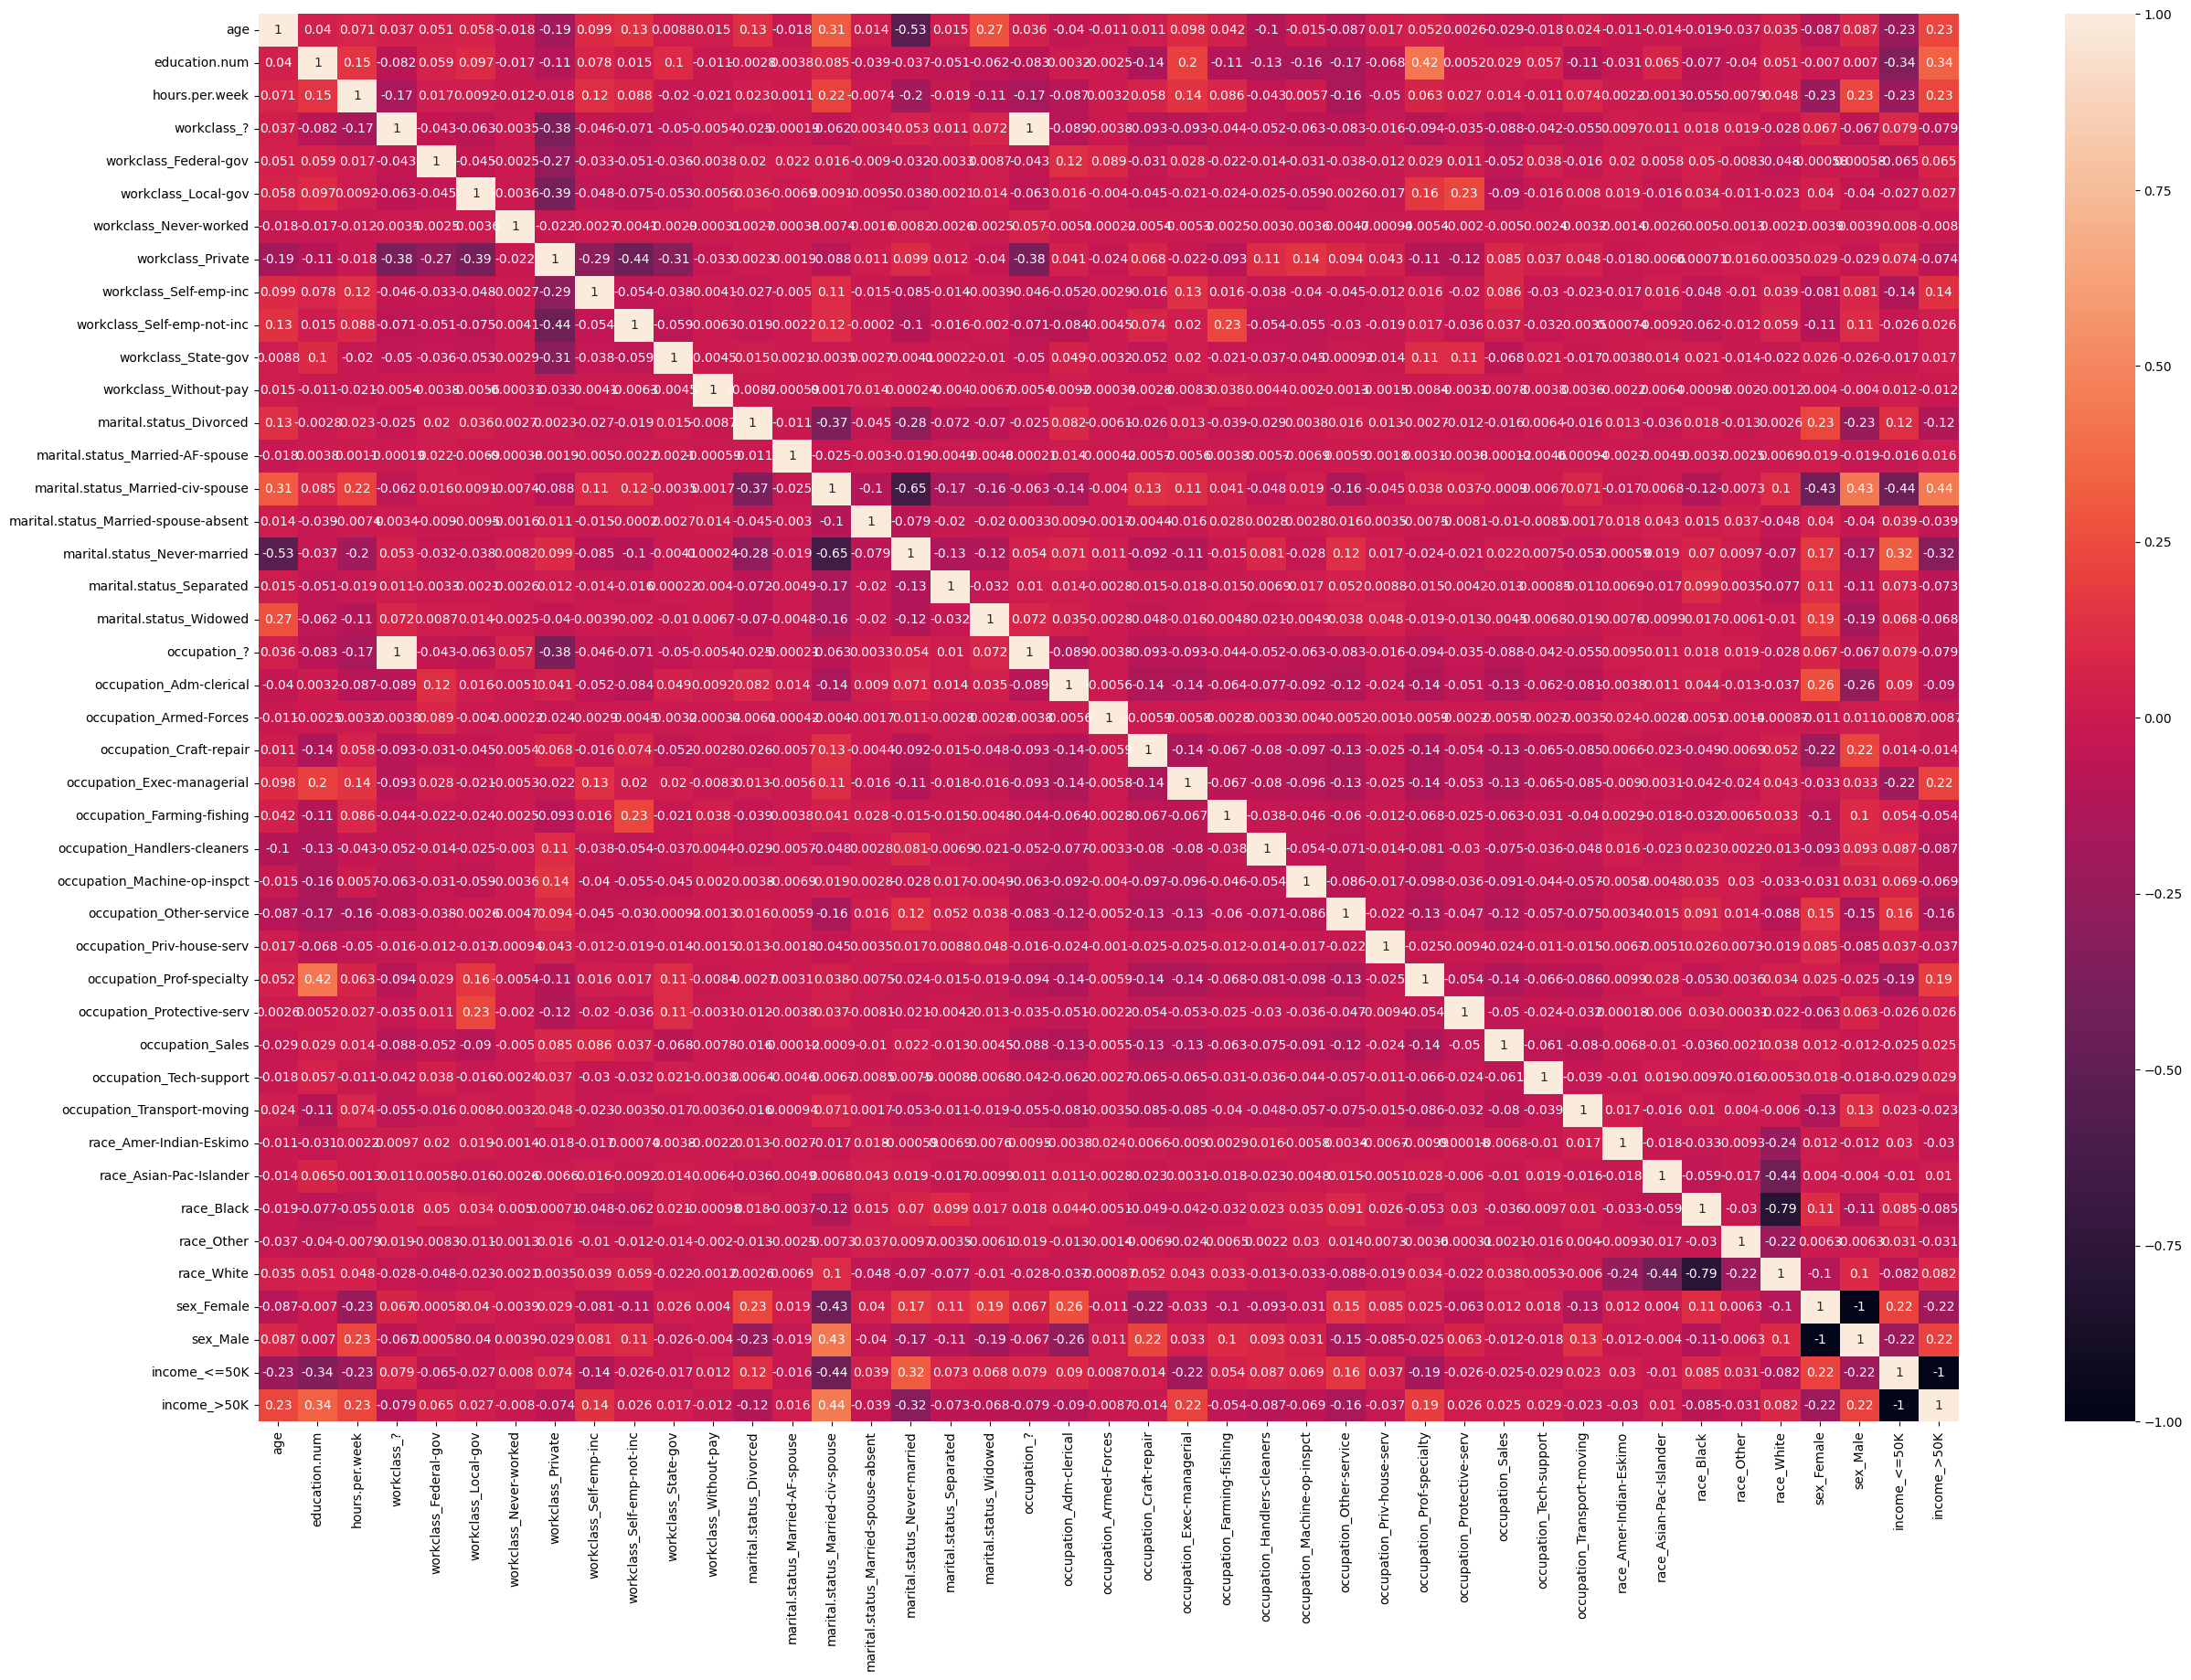

In [ ]:
plt.figure(figsize = (30,20))
sns.heatmap(pd.get_dummies(df_adjusted_income).corr(method='pearson', min_periods=1), annot=True)

# Model Running: Random Forest vs. Gradient Boosting

In [ ]:
start = time.time()
rfc = ensemble.RandomForestClassifier(n_estimators=100, n_jobs=-1)
X = df_adjusted_income.drop('income',1)
Y = df_adjusted_income['income']
X = pd.get_dummies(X)

print(f'{cross_val_score(rfc, X, Y, cv=10)}\n')
print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

<ipython-input-84-4f3df85689a4>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_adjusted_income.drop('income',1)


[0.8028 0.824  0.8216 0.8124 0.8148 0.8264 0.8232 0.8172 0.8228 0.8196]

Cross-validation time elapsed: 22.2 seconds.


Based on the above, the Random Forest Classifiers model yielded around an 81.5% average prediction accuracy. Given the fact that there are a large number of features in this sample, I hope to improve the performance by enhancing the model via inspection of which features hold the greatest importance.

<Axes: >

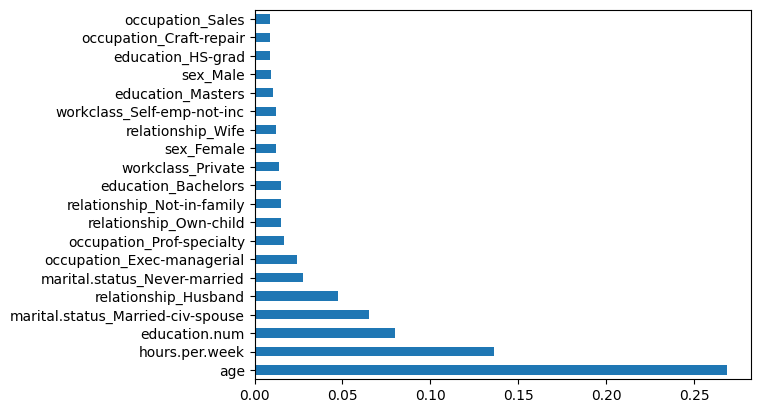

In [ ]:
rfc.fit(X, Y)

feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
df_adjusted_income.head()

,age,workclass,education.num,marital.status,occupation,race,sex,hours.per.week,income
0,40,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,White,Male,70,>50K
1,30,Private,9,Divorced,Craft-repair,White,Female,40,<=50K
2,46,Private,10,Married-civ-spouse,Adm-clerical,White,Male,40,>50K
3,32,Private,11,Married-civ-spouse,Other-service,White,Male,60,>50K
4,54,?,1,Married-civ-spouse,?,White,Female,40,<=50K


In [ ]:
df_adjusted_income["above_50"] = pd.get_dummies(df_adjusted_income.income,drop_first=True)

In [ ]:
df_adjusted_income.head()

,age,workclass,education.num,marital.status,occupation,race,sex,hours.per.week,income,above_50
0,40,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,White,Male,70,>50K,1
1,30,Private,9,Divorced,Craft-repair,White,Female,40,<=50K,0
2,46,Private,10,Married-civ-spouse,Adm-clerical,White,Male,40,>50K,1
3,32,Private,11,Married-civ-spouse,Other-service,White,Male,60,>50K,1
4,54,?,1,Married-civ-spouse,?,White,Female,40,<=50K,0


In [ ]:
X = df_adjusted_income.drop(['above_50','income'],1)
Y = df_adjusted_income['above_50']
X = pd.get_dummies(X)

offset = int(X.shape[0] * 0.8)

X_train, y_train = X[:offset], Y[:offset]
X_test, y_test = X[offset:], Y[offset:]

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

<ipython-input-98-9966b198939c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_adjusted_income.drop(['above_50','income'],1)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


Accuracy Test

In [ ]:
clf.score(X_test, y_test)

0.8434

Precision Test

In [ ]:
y_pred = clf.predict(X_test)
precision_score(y_test,y_pred)

0.7292929292929293

Recall Score

In [ ]:
recall_score(y_test,y_pred)

0.5836701697655619

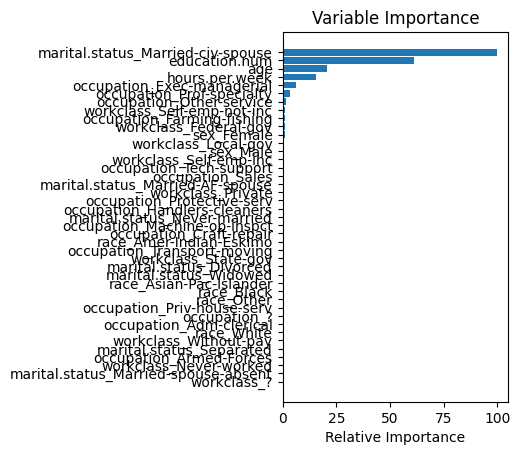

<Figure size 640x1500 with 0 Axes>

In [ ]:
feature_importance = clf.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.figure().set_figheight(15)
plt.show()

Based on the Gradient Boosting model, after 500 iterations being married, having a high education number, being older, working more hours per week, and a higher level of career determine whether or not a person is predicted to make above $50K USD. The gradient boosting model also resulted in accuracy score of 84%, which is higher than the average 81.5% from the Random Forest Model. The problem with the Random Forest Model is that when the dummies are created for the categorical columns in the dataset, it creates far more columns. With so few iterations to go over, the Random Forest Model seems to pull more categories that are relatively not important upon further review. Therefore, taking all of the above into account, it is my opinion that the gradient boosting model is the superior model for this analysis.